In [21]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

def print_umap_graph(umap_df):
    umap_data = pd.DataFrame(
        data = umap_df,
        columns=['umap-2d-one', 'umap-2d-two']
    )

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        palette=sns.color_palette("hls", 2),
        data=umap_data,
        legend="full",
        alpha=0.3
    )
    plt.show()

In [22]:
import pickle

with open('crafted/df_cleaned2.pickle', 'rb') as handle:
    df_cleaned2 = pickle.load(handle)
    
print(df_cleaned2.shape)
df_cleaned2.head()

(1056320, 25)


,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,date,type_credit,type_withdrawal,...,op_withdrawal_in_cash,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest
trans_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,3,12,24,4,1995-03-24,1,0,...,0,1000,1000,0,0,0,0,0,0,0
5,1,20,2,4,15,13,3,1995-04-13,1,0,...,0,3679,4679,0,0,0,0,0,0,0
6,1,30,2,5,19,13,5,1995-05-13,1,0,...,0,3679,20977,0,0,0,0,0,0,0
7,1,31,2,6,24,13,1,1995-06-13,1,0,...,0,3679,26835,0,0,0,0,0,0,0
8,1,30,2,7,28,13,3,1995-07-13,1,0,...,0,3679,30415,0,0,0,0,0,0,0


In [ ]:
df_scaled2 = StandardScaler().fit_transform(df_cleaned2.drop(columns=['date', 'account_id']))
%time umap_1trans_df = umap.UMAP().fit_transform(df_scaled2)

In [25]:
with open('crafted/isolation_forest_1seq.pkl', 'rb') as handle:
    isolation_forests = pickle.load(handle)
    
print(type(isolation_forest_1seq))

/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<class 'pyod.models.iforest.IForest'>


In [26]:
isolation_forests_outliers = np.where(isolation_forests.labels_ == 1)[0]
isolation_forests_inliers = np.where(isolation_forests.labels_ == 0)[0]

print(len(isolation_forests_inliers))
print(len(isolation_forests_outliers))

#plt.figure(figsize=(12,8))
#plt.scatter(*umap_1trans_df.T, s=15, linewidth=0, c='gray', alpha=0.25)
#plt.scatter(*umap_1trans_df[isolation_forests_outliers].T, s=15, linewidth=0, c='red', alpha=0.5)
#plt.show()

1024630
31690


In [28]:
outlying = df_cleaned2.iloc[isolation_forests_outliers,:]
outlying['anomaly'] = 1
inlying = df_cleaned2.iloc[isolation_forests_inliers,:]
inlying['anomaly'] = 0

features = pd.concat([outlying.iloc[:,:-1], inlying.iloc[:,:-1]], axis=0)
features = features.drop(columns=['account_id', 'date'])
labels = pd.concat([outlying.iloc[:,-1], inlying.iloc[:,-1]], axis=0)
print(features.shape, labels.shape)


/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1056320, 23) (1056320,)


In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 199 to 3682987
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   date_days_from_last_trans   1056320 non-null  int64
 1   date_year                   1056320 non-null  int64
 2   date_month                  1056320 non-null  int64
 3   date_week                   1056320 non-null  int64
 4   date_day                    1056320 non-null  int64
 5   date_dayofweek              1056320 non-null  int64
 6   type_credit                 1056320 non-null  uint8
 7   type_withdrawal             1056320 non-null  uint8
 8   type_cash                   1056320 non-null  uint8
 9   op_credit_from_bank         1056320 non-null  uint8
 10  op_withdrawal_from_card     1056320 non-null  uint8
 11  op_credit_in_cash           1056320 non-null  uint8
 12  op_withdrawal_to_bank       1056320 non-null  uint8
 13  op_withdrawal_in_cash    

In [30]:
from sklearn.preprocessing import StandardScaler

features = pd.DataFrame(
    StandardScaler().fit_transform(features),
    index = features.index, 
    columns = features.columns
)

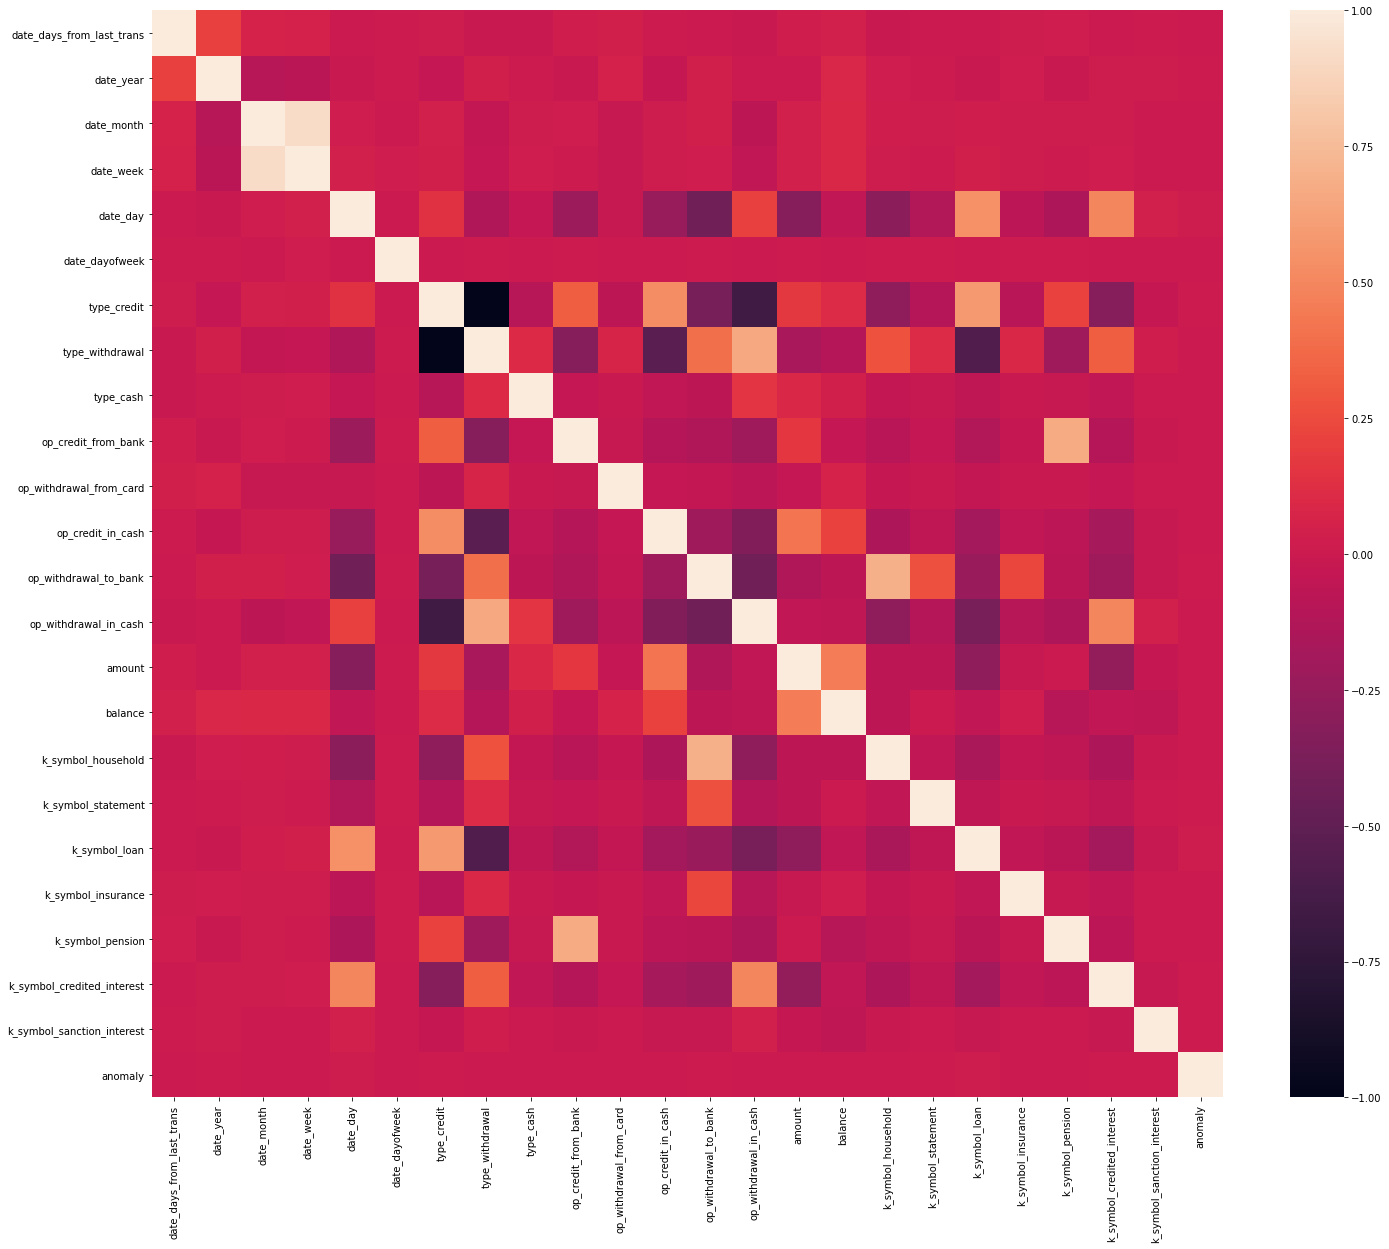

In [31]:
plt.figure(figsize=(24,20))
cor = pd.concat([features, labels], axis=1).corr(method='pearson')
sns.heatmap(cor)
plt.show()

In [57]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(features, labels)

Feature ranking:
1. balance (0.340094)
2. amount (0.205923)
3. date_day (0.098498)
4. date_dayofweek (0.088909)
5. date_month (0.073823)
6. date_week (0.071292)
7. date_days_from_last_trans (0.059635)
8. date_year (0.051853)
9. k_symbol_household (0.002846)
10. type_cash (0.001183)
11. k_symbol_statement (0.000966)
12. op_withdrawal_in_cash (0.000610)
13. k_symbol_pension (0.000560)
14. k_symbol_credited_interest (0.000545)
15. op_withdrawal_to_bank (0.000544)
16. k_symbol_loan (0.000479)
17. k_symbol_insurance (0.000472)
18. op_credit_in_cash (0.000455)
19. op_credit_from_bank (0.000433)
20. op_withdrawal_from_card (0.000301)
21. k_symbol_sanction_interest (0.000214)
22. type_credit (0.000184)
23. type_withdrawal (0.000181)


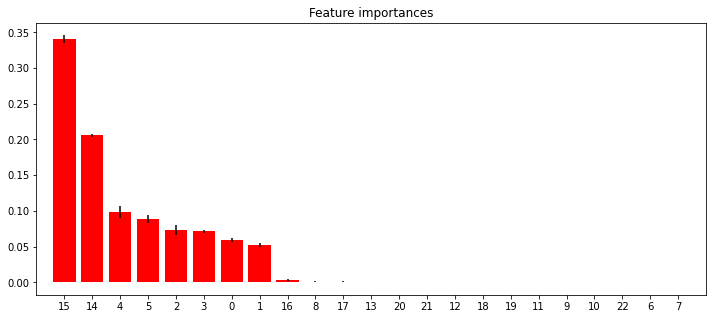

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(
    n_estimators=20,
    class_weight='balanced',
    random_state=0
)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

ordered_features = []
ordered_importances = []
for f in range(X.shape[1]):
    feature_name = X.columns[indices[f]]
    feature_importance = importances[indices[f]]
    print("%d. %s (%f)" % (f + 1, feature_name, feature_importance))
    ordered_features.append(feature_name)
    ordered_importances.append(feature_importance)

plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [59]:
features.columns[indices]

Index(['balance', 'amount', 'date_day', 'date_dayofweek', 'date_month',
       'date_week', 'date_days_from_last_trans', 'date_year',
       'k_symbol_household', 'type_cash', 'k_symbol_statement',
       'op_withdrawal_in_cash', 'k_symbol_pension',
       'k_symbol_credited_interest', 'op_withdrawal_to_bank', 'k_symbol_loan',
       'k_symbol_insurance', 'op_credit_in_cash', 'op_credit_from_bank',
       'op_withdrawal_from_card', 'k_symbol_sanction_interest', 'type_credit',
       'type_withdrawal'],
      dtype='object')

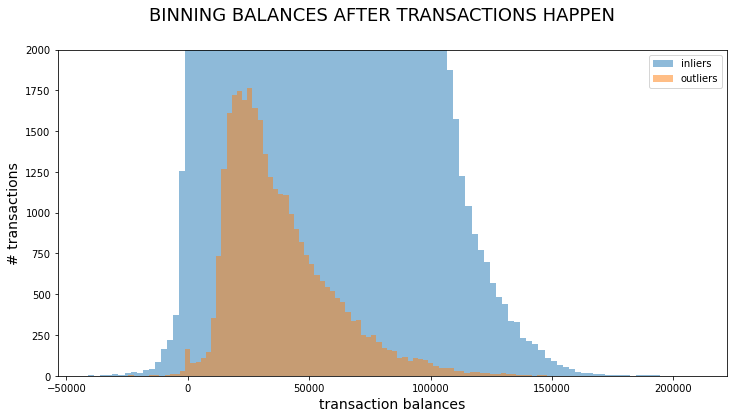

In [66]:
plt.figure(figsize=(12,6))

plt.hist(inlying['balance'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying['balance'], bins=100, alpha=0.5, label='outliers')

plt.ylim([0,2000])

plt.xlabel('transaction balances', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('BINNING BALANCES AFTER TRANSACTIONS HAPPEN', size=18)
plt.legend(loc='upper right')

plt.show()

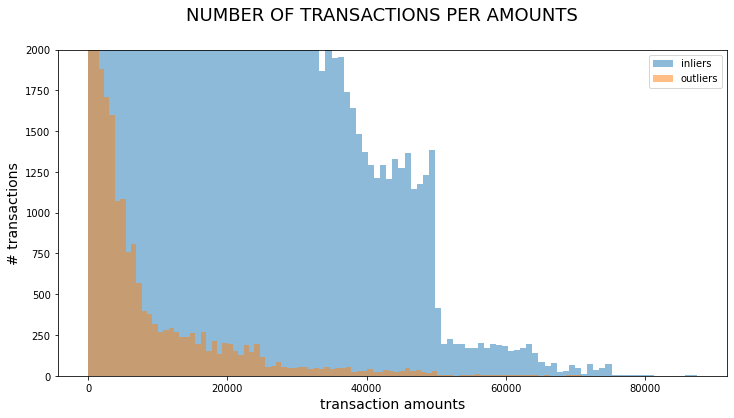

In [61]:
plt.figure(figsize=(12,6))

plt.hist(inlying['amount'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying['amount'], bins=100, alpha=0.5, label='outliers')

plt.ylim([0,2000])

plt.xlabel('transaction amounts', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('NUMBER OF TRANSACTIONS PER AMOUNTS', size=18)
plt.legend(loc='upper right')

plt.show()

In [64]:
df_anomaly = pd.concat([outlying,inlying], axis=0)
print(df_anomaly.loc[df_anomaly['anomaly']==1,'amount'].mean())
print(df_anomaly.loc[df_anomaly['anomaly']==0,'amount'].mean())

5506.556421584096
5937.127962288826


## Analysis over 2-length transactions

In [73]:
import pickle

with open('crafted/sequences_2trans.pickle', 'rb') as handle:
    sequences_2trans = pickle.load(handle)
    
print(sequences_2trans.shape)
sequences_2trans.head()

(1051820, 42)


,0_date_days_from_last_trans,0_date_year,0_date_month,0_date_day,0_date_dayofweek,0_type_credit,0_type_cash,0_op_credit_from_bank,0_op_withdrawal_from_card,0_op_credit_in_cash,...,1_op_withdrawal_in_cash,1_amount,1_balance,1_k_symbol_household,1_k_symbol_statement,1_k_symbol_loan,1_k_symbol_insurance,1_k_symbol_pension,1_k_symbol_credited_interest,1_k_symbol_sanction_interest
0,0,2,3,24,4,1,0,0,0,1,...,0,3679,4679,0,0,0,0,0,0,0
1,20,2,4,13,3,1,0,1,0,0,...,0,3679,20977,0,0,0,0,0,0,0
2,30,2,5,13,5,1,0,1,0,0,...,0,3679,26835,0,0,0,0,0,0,0
3,31,2,6,13,1,1,0,1,0,0,...,0,3679,30415,0,0,0,0,0,0,0
4,30,2,7,13,3,1,0,1,0,0,...,0,3679,28903,0,0,0,0,0,0,0


In [ ]:
sequences_2trans_scaled = StandardScaler().fit_transform(sequences_2trans.drop(columns=['date', 'account_id']))
%time umap_2trans_df = umap.UMAP().fit_transform(sequences_2trans_scaled)

In [74]:
with open('crafted/isolation_forest_2seq.pkl', 'rb') as handle:
    isolation_forests2 = pickle.load(handle)
    
print(type(isolation_forests2))

<class 'pyod.models.iforest.IForest'>


/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [76]:
isolation_forests_outliers2 = np.where(isolation_forests2.labels_ == 1)[0]
isolation_forests_inliers2 = np.where(isolation_forests2.labels_ == 0)[0]

print(len(isolation_forests_inliers2))
print(len(isolation_forests_outliers2))

#plt.figure(figsize=(12,8))
#plt.scatter(*umap_1trans_df.T, s=15, linewidth=0, c='gray', alpha=0.25)
#plt.scatter(*umap_1trans_df[isolation_forests_outliers].T, s=15, linewidth=0, c='red', alpha=0.5)
#plt.show()

1020265
31555


In [78]:
outlying2 = sequences_2trans.iloc[isolation_forests_outliers2,:]
outlying2['anomaly'] = 1
inlying2 = sequences_2trans.iloc[isolation_forests_inliers2,:]
inlying2['anomaly'] = 0

features2 = pd.concat([outlying2.iloc[:,:-1], inlying2.iloc[:,:-1]], axis=0)
labels2 = pd.concat([outlying2.iloc[:,-1], inlying2.iloc[:,-1]], axis=0)
print(features2.shape, labels2.shape)


/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1051820, 42) (1051820,)


In [79]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051820 entries, 161 to 1051819
Data columns (total 42 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   0_date_days_from_last_trans   1051820 non-null  object
 1   0_date_year                   1051820 non-null  object
 2   0_date_month                  1051820 non-null  object
 3   0_date_day                    1051820 non-null  object
 4   0_date_dayofweek              1051820 non-null  object
 5   0_type_credit                 1051820 non-null  object
 6   0_type_cash                   1051820 non-null  object
 7   0_op_credit_from_bank         1051820 non-null  object
 8   0_op_withdrawal_from_card     1051820 non-null  object
 9   0_op_credit_in_cash           1051820 non-null  object
 10  0_op_withdrawal_to_bank       1051820 non-null  object
 11  0_op_withdrawal_in_cash       1051820 non-null  object
 12  0_amount                      1051820 no

In [80]:
from sklearn.preprocessing import StandardScaler

features2 = pd.DataFrame(
    StandardScaler().fit_transform(features2),
    index = features2.index, 
    columns = features2.columns
)

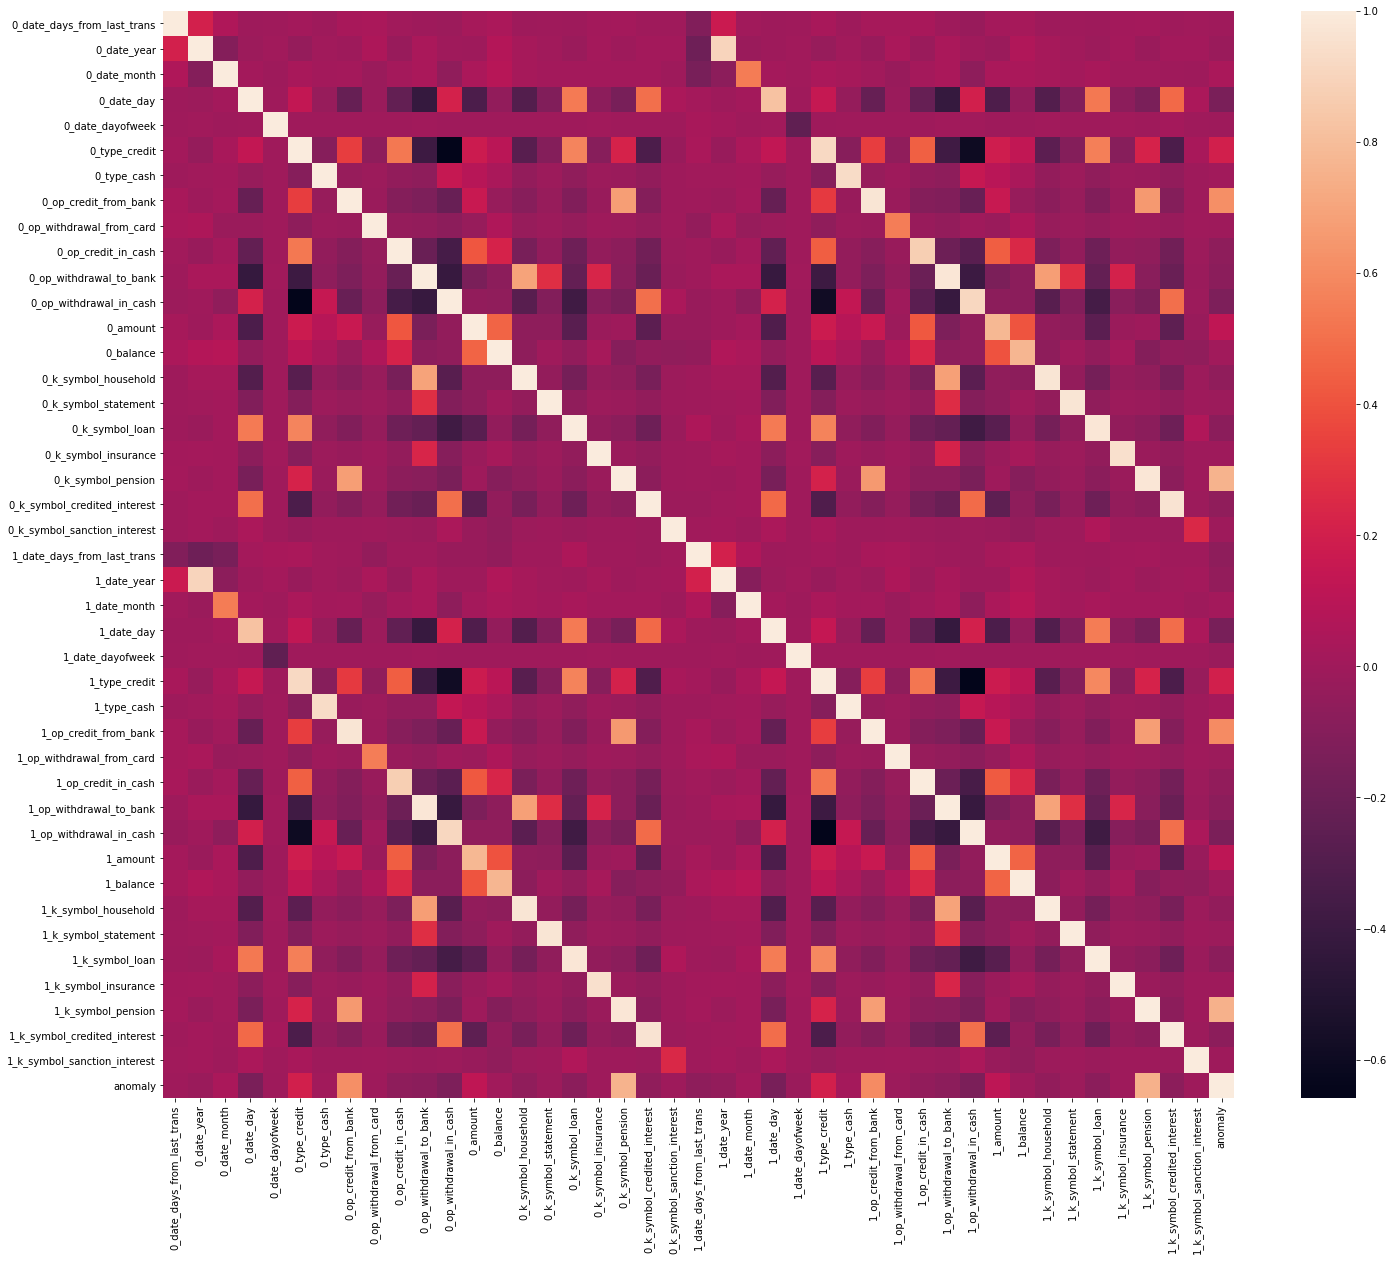

In [81]:
plt.figure(figsize=(24,20))
cor = pd.concat([features2, labels2], axis=1).corr(method='pearson')
sns.heatmap(cor)
plt.show()

In [82]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X2, y2 = oversample.fit_resample(features2, labels2)

Feature ranking:
1. 1_op_credit_from_bank (0.178681)
2. 0_op_credit_from_bank (0.129843)
3. 1_k_symbol_pension (0.091728)
4. 1_type_credit (0.090775)
5. 0_k_symbol_pension (0.086650)
6. 0_amount (0.029515)
7. 0_op_credit_in_cash (0.029088)
8. 1_k_symbol_loan (0.027467)
9. 0_date_day (0.026791)
10. 1_op_withdrawal_in_cash (0.026728)
11. 0_type_credit (0.023265)
12. 0_op_withdrawal_in_cash (0.021739)
13. 1_date_year (0.021643)
14. 0_k_symbol_loan (0.021313)
15. 1_amount (0.019554)
16. 1_type_cash (0.019386)
17. 0_balance (0.017514)
18. 1_date_days_from_last_trans (0.017278)
19. 1_balance (0.016508)
20. 1_op_credit_in_cash (0.012457)
21. 0_op_withdrawal_to_bank (0.011999)
22. 0_k_symbol_credited_interest (0.011481)
23. 0_date_year (0.010148)
24. 0_date_days_from_last_trans (0.008705)
25. 0_k_symbol_household (0.006056)
26. 0_date_month (0.005588)
27. 0_type_cash (0.005095)
28. 1_date_day (0.005090)
29. 1_date_dayofweek (0.004990)
30. 1_date_month (0.004865)
31. 0_date_dayofweek (0.004283)

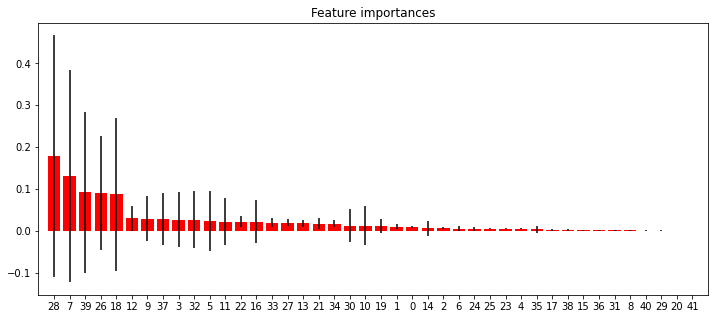

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(
    n_estimators=20,
    class_weight='balanced',
    random_state=0
)

forest.fit(X2, y2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

ordered_features = []
ordered_importances = []
for f in range(X2.shape[1]):
    feature_name = X2.columns[indices[f]]
    feature_importance = importances[indices[f]]
    print("%d. %s (%f)" % (f + 1, feature_name, feature_importance))
    ordered_features.append(feature_name)
    ordered_importances.append(feature_importance)

plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), indices)
plt.xlim([-1, X2.shape[1]])
plt.show()

In [84]:
features.columns[indices]

Index(['1_op_credit_from_bank', '0_op_credit_from_bank', '1_k_symbol_pension',
       '1_type_credit', '0_k_symbol_pension', '0_amount',
       '0_op_credit_in_cash', '1_k_symbol_loan', '0_date_day',
       '1_op_withdrawal_in_cash', '0_type_credit', '0_op_withdrawal_in_cash',
       '1_date_year', '0_k_symbol_loan', '1_amount', '1_type_cash',
       '0_balance', '1_date_days_from_last_trans', '1_balance',
       '1_op_credit_in_cash', '0_op_withdrawal_to_bank',
       '0_k_symbol_credited_interest', '0_date_year',
       '0_date_days_from_last_trans', '0_k_symbol_household', '0_date_month',
       '0_type_cash', '1_date_day', '1_date_dayofweek', '1_date_month',
       '0_date_dayofweek', '1_k_symbol_household', '0_k_symbol_insurance',
       '1_k_symbol_insurance', '0_k_symbol_statement', '1_k_symbol_statement',
       '1_op_withdrawal_to_bank', '0_op_withdrawal_from_card',
       '1_k_symbol_credited_interest', '1_op_withdrawal_from_card',
       '0_k_symbol_sanction_interest', '1_k_

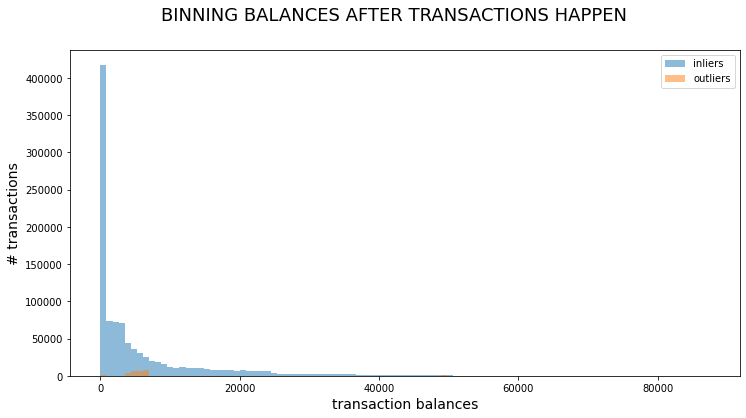

In [87]:
plt.figure(figsize=(12,6))

plt.hist(inlying2['0_amount'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying2['0_amount'], bins=100, alpha=0.5, label='outliers')

#plt.ylim([0,2000])

plt.xlabel('transaction balances', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('BINNING BALANCES AFTER TRANSACTIONS HAPPEN', size=18)
plt.legend(loc='upper right')

plt.show()